# Plot for a comparison of the number of pulses in the original and decomposed graphs for large dense graphs from MQLib library.

Figure 13 in the paper.

This notebook generates a plot comparing the number of pulses in the original graphs and in the decomposed graphs using binary and exponential decompositions for the ten densest weighted graphs from MQLib library with fewer than 500,000 edges.

It uses data stored in a CSV file `data/MQLib_large_graphs_decomposition.csv` generated from the script `large-graphs.ipynb` under the `notebooks` folder.


In [1]:
import os
import logging
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.weight": "bold",
    "axes.labelweight": "bold",
    "axes.titleweight": "bold",
    "figure.dpi": 200,
})

logging.basicConfig(level=logging.WARNING)

os.chdir('..')

# Load data

In [2]:
df_metadata = pd.read_csv('data/MQLib_instances_metadata.csv')              # Load metadata for MQLib instances
df_large = pd.read_csv('data/MQLib_large_graphs_decomposition.csv')         # Load decomposition data for large graphs

large_graphs = df_large['instance_name'].unique().tolist()                  # Get the names of large graphs
df_metadata = df_metadata[df_metadata['Instance'].isin(large_graphs)]       # Filter metadata to include only large graphs

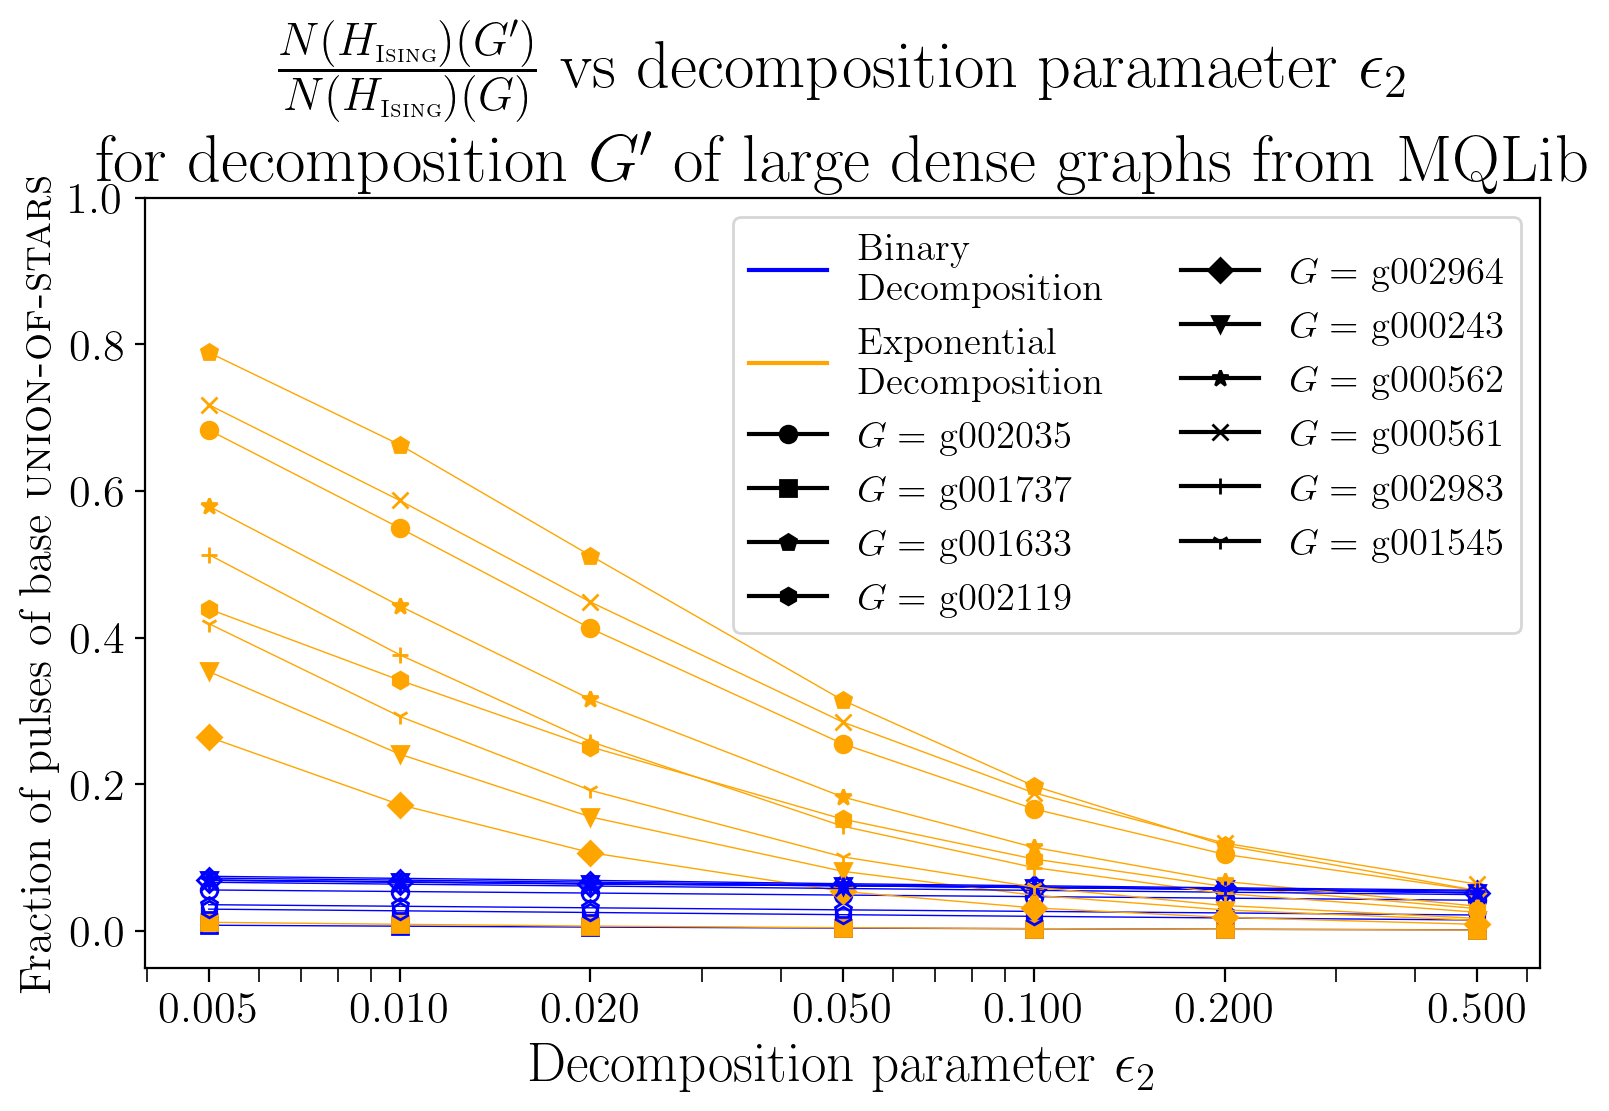

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] + ['b', 'g', 'r', 'c', 'm', 'y', 'k']
markers = ['o', 's', 'p', 'h', 'D', 'v', '*', 'x', '+', '1', '2', '3', '4', '8']

bin_color = 'b'
exp_color = 'g'

ax.plot([], [], label='Binary\nDecomposition', color='blue')
ax.plot([], [], label='Exponential\nDecomposition', color='orange')

for instance_name in large_graphs:
    original_pulses = df_large[
        (df_large['instance_name'] == instance_name) & (df_large['decomposition_type'] == 'Original')
        ]['number_of_pulses'].values[0]

    df_instance = df_large[df_large['instance_name'] == instance_name].copy()
    df_instance['pulses_ratio'] = df_instance['number_of_pulses'] / original_pulses

    df_instance_bin = df_instance[df_instance['decomposition_type'] == 'Binary']
    df_instance_exp = df_instance[df_instance['decomposition_type'] == 'Exponential']

    marker = markers[large_graphs.index(instance_name)]

    ax.plot(df_instance_bin['decomposition_epsilon'], df_instance_bin['pulses_ratio'], marker=marker, color='blue', markerfacecolor='none', linewidth=0.5)
    ax.plot(df_instance_exp['decomposition_epsilon'], df_instance_exp['pulses_ratio'], marker=marker, color='orange', linewidth=0.5)
    ax.plot([], [], color='black', label=r'$G = $ ' + instance_name, marker=marker)

    del df_instance


ax.set_xlabel(r'Decomposition parameter $\epsilon_2$', fontsize=20)
ax.set_xscale('log')
ax.set_xticks([0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5])
ax.xaxis.set_tick_params(labelsize=16)
ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())  # Ensure numerical labels show up correctly
ax.tick_params(axis='x', which='both', length=5)  # Optional: Adjust tick size

ax.set_ylabel(r'Fraction of pulses of base $\textsc{union-of-stars}$', fontsize=16)
ax.set_ylim(-0.05, 1.0)
ax.yaxis.set_tick_params(labelsize=16)

ax.legend(fontsize=14, ncol=2)

ax.set_title(
    r"$\frac{N(H_{\small \textsc{Ising}})(G')}{N(H_{\small \textsc{Ising}})(G)}$ vs decomposition paramaeter $\epsilon_2$" + "\nfor decomposition $G'$ of large dense graphs from MQLib", fontsize=24
)
plt.show()
